#### Imports

In [8]:
# Install the statsmodels package
from statsmodels.tsa.ar_model import AutoReg # AR model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from arima_models_family import ARIMAFamily
import constant
import warnings

warnings.filterwarnings("ignore")

#### Read data (Assume data is clean and processed)


In [9]:
data = pd.read_parquet(constant.file_path)

In [10]:
data

,open
Date,
2024-04-29,634.40
2024-04-30,624.20
2024-05-01,627.60
2024-05-02,624.20
2024-05-03,633.70
...,...
2025-04-24,404.00
2025-04-25,400.90
2025-04-26,402.45


In [11]:
# object initialization
obj_1 = ARIMAFamily(data)

# Split the data into train and test sets
train_df,test_df = obj_1.train_test_split(data,'count',20)

In [12]:
test_df

,open
Date,
2025-04-09,349.000000
2025-04-10,351.000000
2025-04-11,355.000000
2025-04-12,353.000000
2025-04-13,353.000000
2025-04-14,353.666667
2025-04-15,367.000000
2025-04-16,370.000000
2025-04-17,380.000000


In [13]:

sub_train_df,val_df = obj_1.train_test_split(train_df,'count',60)

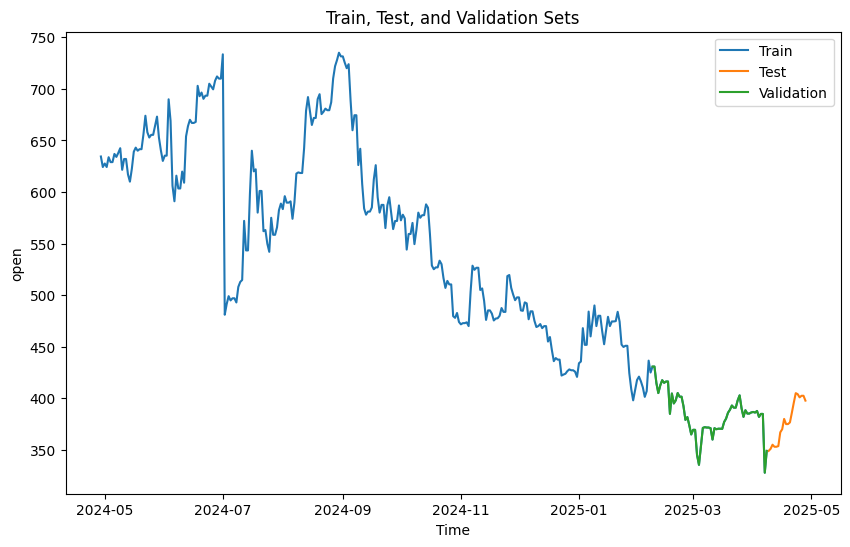

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(train_df['open'], label='Train')
plt.plot(test_df['open'], label='Test')
plt.plot(val_df['open'], label='Validation')
plt.title('Train, Test, and Validation Sets')
plt.xlabel('Time')
plt.ylabel('open')
plt.legend()
plt.show()

### Model Fitting

## 1) Auto Reg

In [8]:

obj_1.fit_model(AutoReg,train_df,lags=30) # AR model

In [9]:
obj_1.predict(train_df, test_df)

(            predictions      actual         mse       rmse     mape  \
 2025-03-10   372.711961  371.000000  328.936377  18.136603  4.11063   
 2025-03-11   378.766077  360.000000  328.936377  18.136603  4.11063   
 2025-03-12   382.255196  371.000000  328.936377  18.136603  4.11063   
 2025-03-13   386.842865  370.000000  328.936377  18.136603  4.11063   
 2025-03-14   382.088656  370.500000  328.936377  18.136603  4.11063   
 2025-03-15   381.066628  370.500000  328.936377  18.136603  4.11063   
 2025-03-16   375.612902  370.333333  328.936377  18.136603  4.11063   
 2025-03-17   381.302789  377.000000  328.936377  18.136603  4.11063   
 2025-03-18   380.277578  380.300000  328.936377  18.136603  4.11063   
 2025-03-19   375.955994  386.000000  328.936377  18.136603  4.11063   
 2025-03-20   376.649234  388.850000  328.936377  18.136603  4.11063   
 2025-03-21   376.685275  393.000000  328.936377  18.136603  4.11063   
 2025-03-22   376.544954  390.925000  328.936377  18.136603  4.1

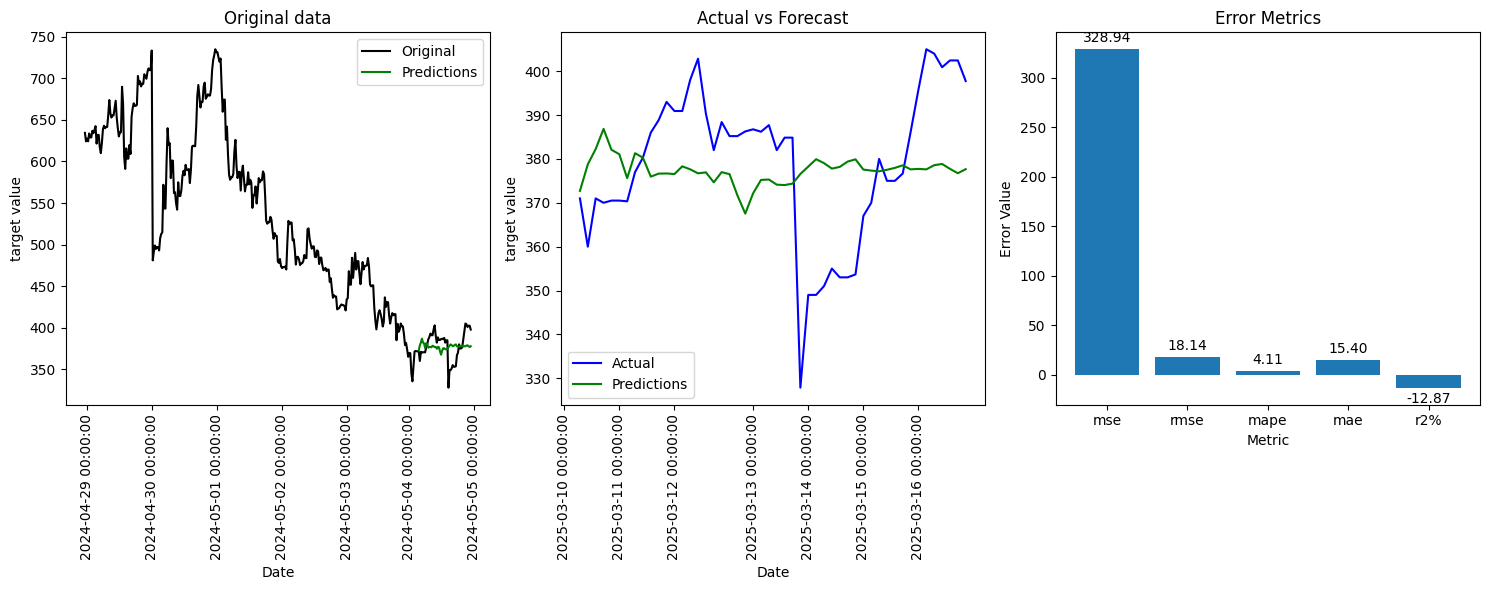

In [10]:

obj_1.data_plotting()

In [12]:
obj_1.predict(train_df, test_df)

(            predictions      actual          mse       rmse       mape  \
 2025-03-10   374.002862  371.000000  2144.589164  46.309709  10.249136   
 2025-03-11   376.312677  360.000000  2144.589164  46.309709  10.249136   
 2025-03-12   378.580233  371.000000  2144.589164  46.309709  10.249136   
 2025-03-13   380.806303  370.000000  2144.589164  46.309709  10.249136   
 2025-03-14   382.991646  370.500000  2144.589164  46.309709  10.249136   
 2025-03-15   385.137008  370.500000  2144.589164  46.309709  10.249136   
 2025-03-16   387.243119  370.333333  2144.589164  46.309709  10.249136   
 2025-03-17   389.310698  377.000000  2144.589164  46.309709  10.249136   
 2025-03-18   391.340450  380.300000  2144.589164  46.309709  10.249136   
 2025-03-19   393.333067  386.000000  2144.589164  46.309709  10.249136   
 2025-03-20   395.289228  388.850000  2144.589164  46.309709  10.249136   
 2025-03-21   397.209601  393.000000  2144.589164  46.309709  10.249136   
 2025-03-22   399.094839 

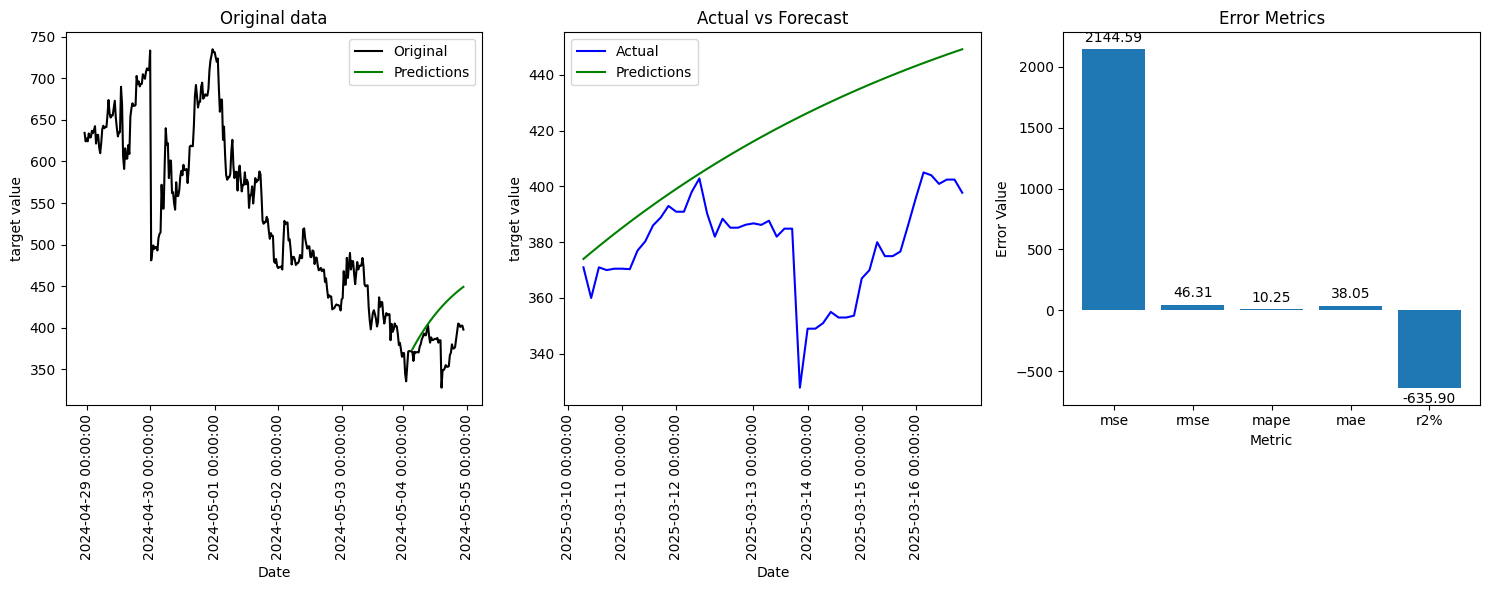

In [13]:

obj_1.data_plotting()

## 2) ARIMA MODEL ERROR TERM CONSIDERATION 

In [8]:
obj_1.fit_model(ARIMA,train_df,order=(0,0,5)) #  Moving Average model

In [9]:
obj_1.predict(train_df, test_df)

(            predictions      actual           mse        rmse       mape  \
 2025-03-10   428.109264  371.000000  26652.304185  163.255334  42.801846   
 2025-03-11   450.196266  360.000000  26652.304185  163.255334  42.801846   
 2025-03-12   493.070366  371.000000  26652.304185  163.255334  42.801846   
 2025-03-13   549.605620  370.000000  26652.304185  163.255334  42.801846   
 2025-03-14   547.898842  370.500000  26652.304185  163.255334  42.801846   
 2025-03-15   545.421698  370.500000  26652.304185  163.255334  42.801846   
 2025-03-16   545.421698  370.333333  26652.304185  163.255334  42.801846   
 2025-03-17   545.421698  377.000000  26652.304185  163.255334  42.801846   
 2025-03-18   545.421698  380.300000  26652.304185  163.255334  42.801846   
 2025-03-19   545.421698  386.000000  26652.304185  163.255334  42.801846   
 2025-03-20   545.421698  388.850000  26652.304185  163.255334  42.801846   
 2025-03-21   545.421698  393.000000  26652.304185  163.255334  42.801846   

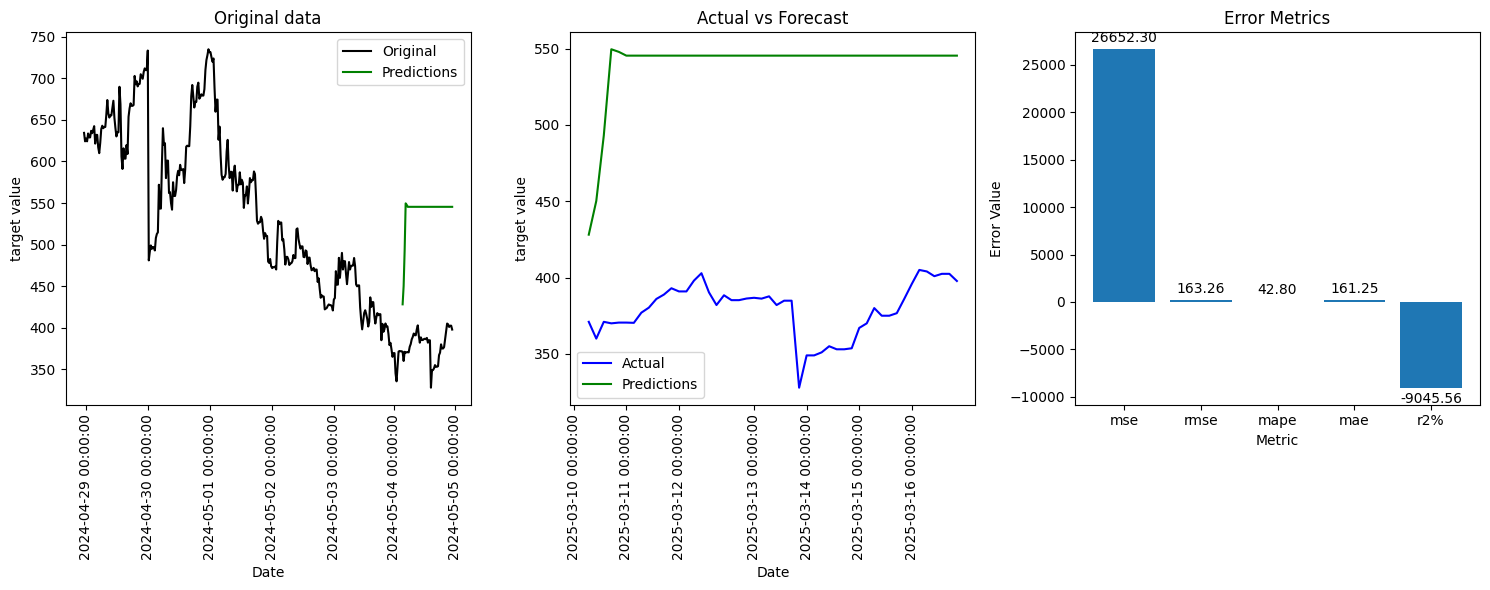

In [10]:
obj_1.data_plotting()

In [15]:
model_fitted = obj_1.optimization(ARIMA,train_df,sub_train_df,val_df) # AR model

[I 2025-05-26 15:27:59,400] A new study created in memory with name: no-name-c1ca88ba-fec1-4845-9a92-96df35a124a2
[I 2025-05-26 15:28:02,943] Trial 0 finished with value: 651.8028460776054 and parameters: {'p': 6, 'd': 2, 'q': 19}. Best is trial 0 with value: 651.8028460776054.
[I 2025-05-26 15:28:03,895] Trial 1 finished with value: 512.1521544834621 and parameters: {'p': 12, 'd': 2, 'q': 1}. Best is trial 1 with value: 512.1521544834621.
[I 2025-05-26 15:28:07,176] Trial 2 finished with value: 623.1934288930838 and parameters: {'p': 18, 'd': 3, 'q': 9}. Best is trial 1 with value: 512.1521544834621.
[I 2025-05-26 15:28:08,895] Trial 3 finished with value: 447.66300512077595 and parameters: {'p': 4, 'd': 3, 'q': 13}. Best is trial 3 with value: 447.66300512077595.
[I 2025-05-26 15:28:12,671] Trial 4 finished with value: 512.021622293221 and parameters: {'p': 11, 'd': 2, 'q': 19}. Best is trial 3 with value: 447.66300512077595.
[I 2025-05-26 15:28:13,798] Trial 5 finished with value: 6

Best ARIMA order: {'p': 4, 'd': 3, 'q': 13}
Best MSE: 447.66300512077595


In [16]:
obj_1.predict(train_df, test_df)

(            predictions      actual          mse       rmse       mape  \
 2025-04-09   357.485179  349.000000  2511.765043  50.117512  10.755111   
 2025-04-10   346.849130  351.000000  2511.765043  50.117512  10.755111   
 2025-04-11   346.676673  355.000000  2511.765043  50.117512  10.755111   
 2025-04-12   343.725587  353.000000  2511.765043  50.117512  10.755111   
 2025-04-13   344.082075  353.000000  2511.765043  50.117512  10.755111   
 2025-04-14   341.847278  353.666667  2511.765043  50.117512  10.755111   
 2025-04-15   344.890355  367.000000  2511.765043  50.117512  10.755111   
 2025-04-16   338.869298  370.000000  2511.765043  50.117512  10.755111   
 2025-04-17   341.270390  380.000000  2511.765043  50.117512  10.755111   
 2025-04-18   333.950125  375.000000  2511.765043  50.117512  10.755111   
 2025-04-19   339.452279  375.000000  2511.765043  50.117512  10.755111   
 2025-04-20   332.333112  376.666667  2511.765043  50.117512  10.755111   
 2025-04-21   333.189110 

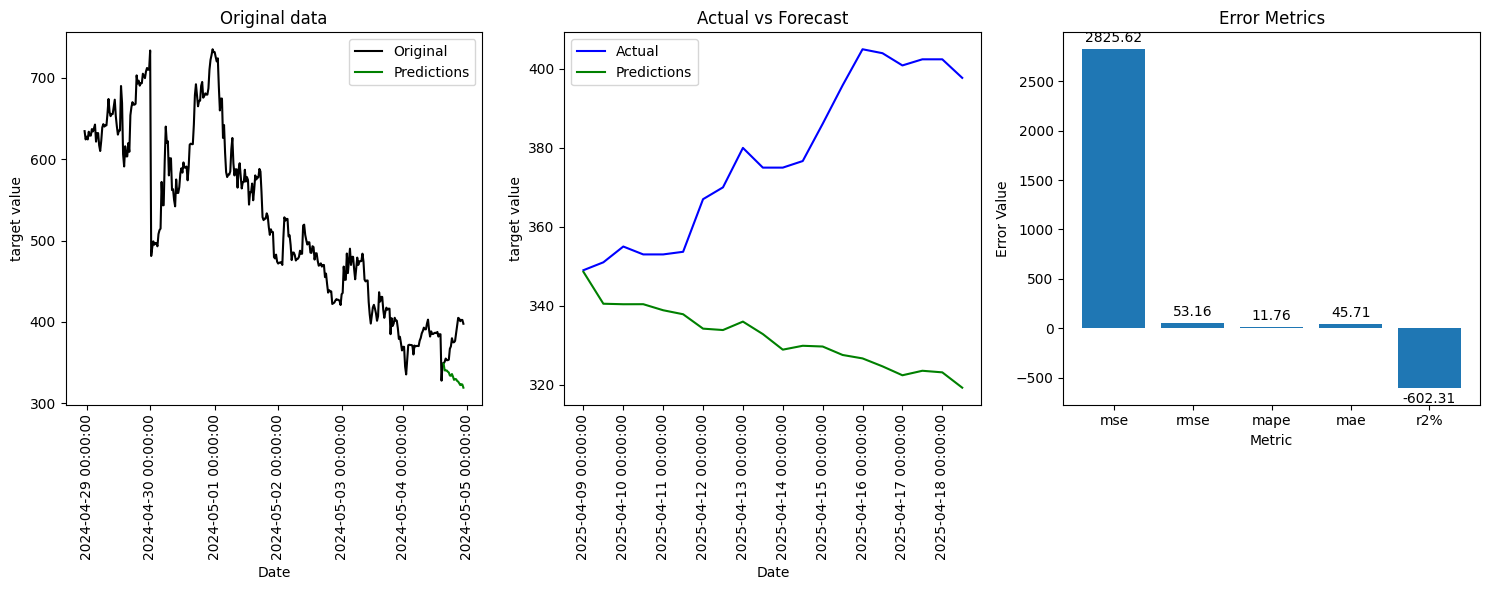

In [21]:
obj_1.data_plotting()

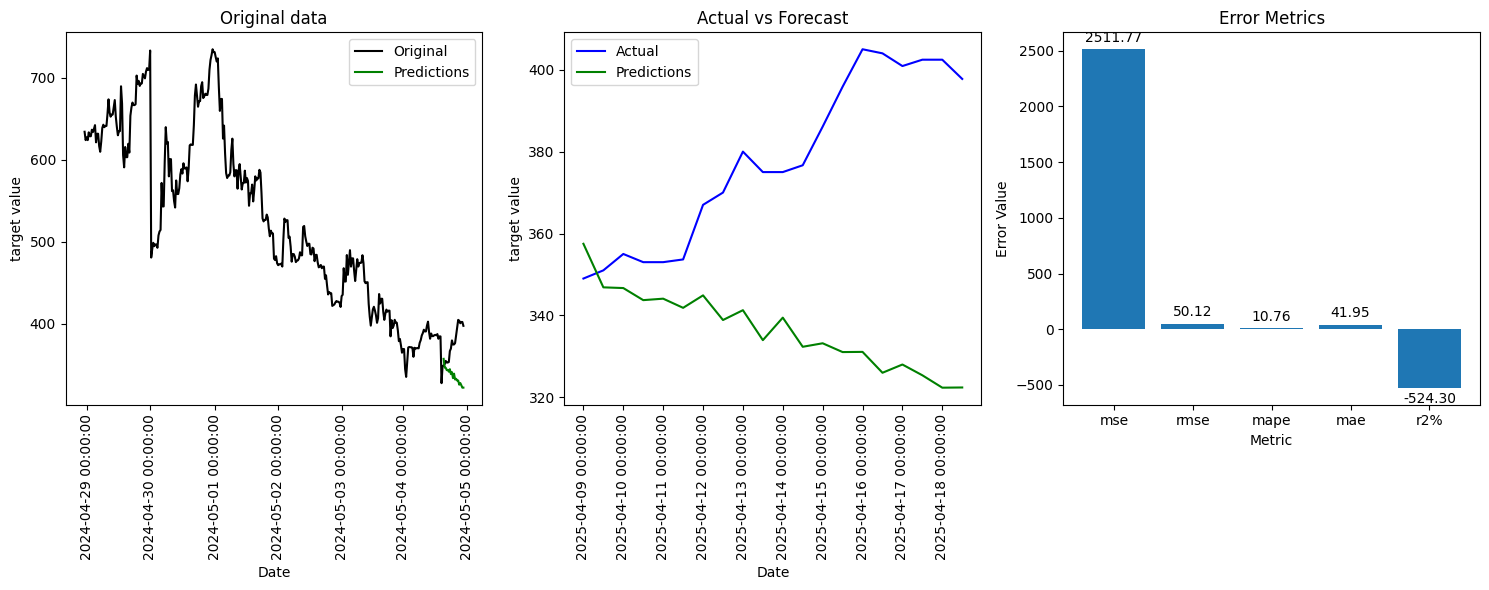

In [17]:
obj_1.data_plotting()

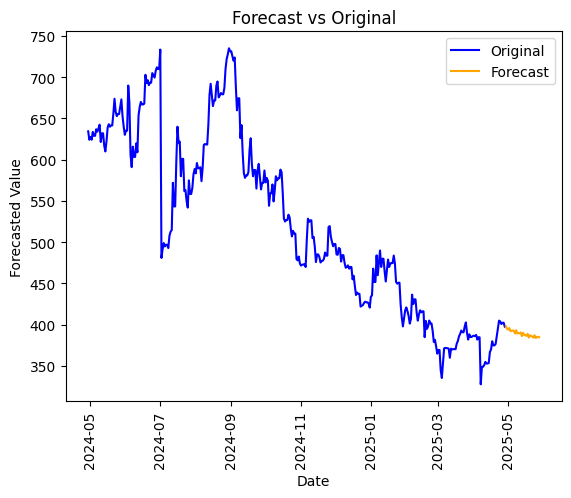

,Forecast
2025-04-29,398.165066
2025-04-30,395.079160
2025-05-01,394.072912
2025-05-02,395.985177
2025-05-03,392.353283
2025-05-04,392.571918
2025-05-05,393.181169
2025-05-06,392.430546
2025-05-07,389.466748
2025-05-08,393.341879


In [18]:
# ARIMA model
obj_1.forecast(ARIMA,data,steps = 30)

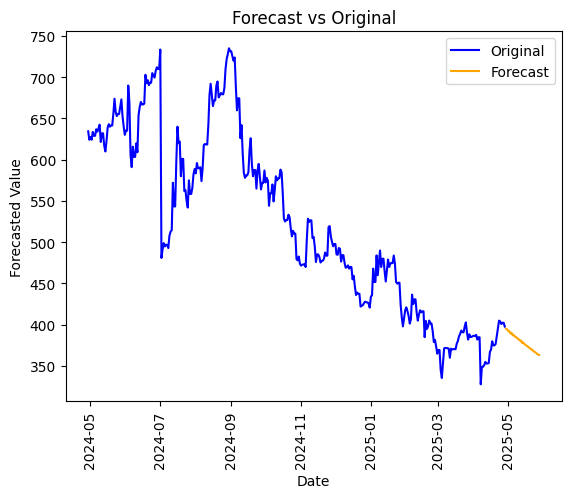

,Forecast
2025-04-29,395.222392
2025-04-30,394.675865
2025-05-01,392.343492
2025-05-02,392.372324
2025-05-03,389.240005
2025-05-04,390.191791
2025-05-05,387.182916
2025-05-06,387.503092
2025-05-07,385.387227
2025-05-08,385.192461


In [14]:
# ARIMA model
obj_1.forecast(ARIMA,data,steps = 30)

### 3) ARMA MODEL 

In [ ]:

obj_1.fit_model(ARIMA,train_df,order=(10,0,15))

In [ ]:
obj_1.predict(train_df, test_df)

            predictions      actual         mse      rmse      mape       mae  \
2025-04-09   353.644043  349.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-10   355.541213  351.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-11   352.030658  355.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-12   355.391447  353.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-13   350.436247  353.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-14   357.290886  353.666667  170.630203  13.06255  2.547372  9.969082   
2025-04-15   362.055803  367.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-16   365.945852  370.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-17   371.351972  380.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-18   369.691729  375.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-19   369.119428  375.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-20   377.743523  376

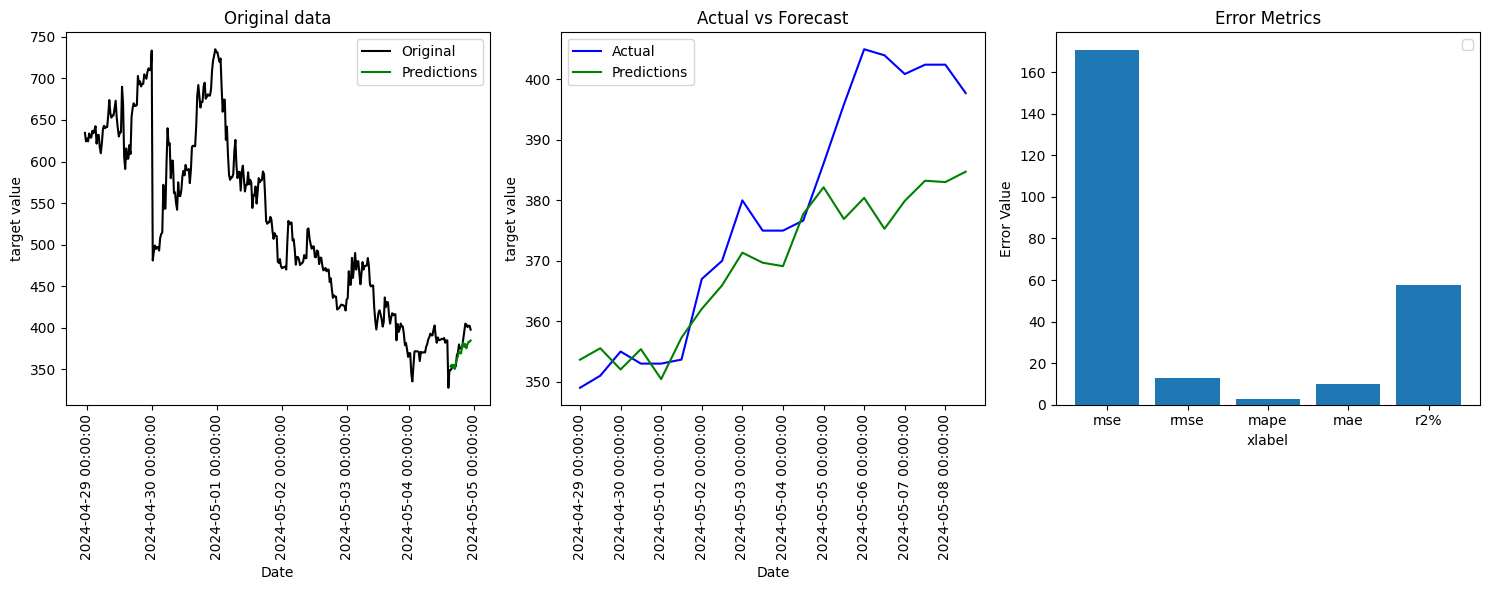

In [ ]:
obj_1.data_plotting()

### 4) ARIMA MODEL

In [ ]:

obj_1.fit_model(ARIMA,train_df,order=(10,1,15))

            predictions      actual         mse       rmse      mape  \
2025-04-09   354.345480  349.000000  557.494957  23.611331  4.895549   
2025-04-10   353.908664  351.000000  557.494957  23.611331  4.895549   
2025-04-11   349.338431  355.000000  557.494957  23.611331  4.895549   
2025-04-12   352.340803  353.000000  557.494957  23.611331  4.895549   
2025-04-13   345.938153  353.000000  557.494957  23.611331  4.895549   
2025-04-14   352.092719  353.666667  557.494957  23.611331  4.895549   
2025-04-15   356.248693  367.000000  557.494957  23.611331  4.895549   
2025-04-16   358.490799  370.000000  557.494957  23.611331  4.895549   
2025-04-17   361.862797  380.000000  557.494957  23.611331  4.895549   
2025-04-18   358.176498  375.000000  557.494957  23.611331  4.895549   
2025-04-19   356.201799  375.000000  557.494957  23.611331  4.895549   
2025-04-20   364.758674  376.666667  557.494957  23.611331  4.895549   
2025-04-21   369.094103  386.100000  557.494957  23.611331  4.89

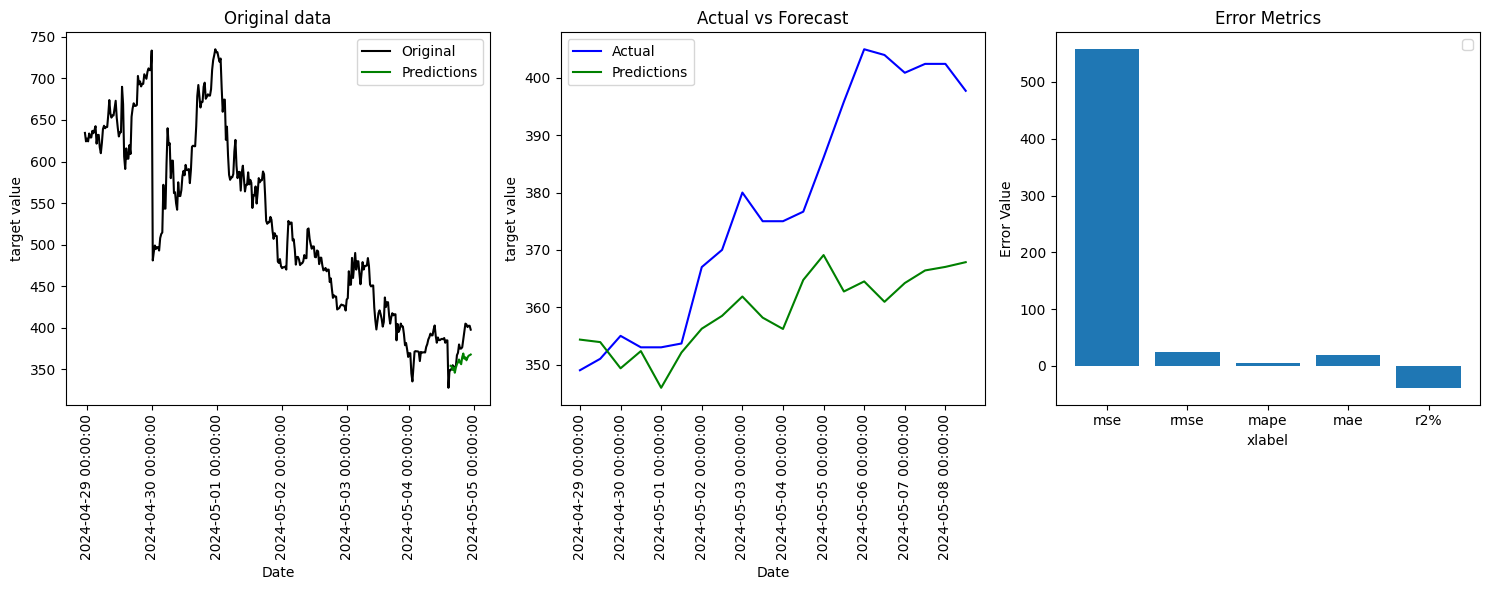

In [ ]:
obj_1.predict(train_df, test_df)
obj_1.data_plotting()